In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')


In [8]:
def fullDay(data):
        """
           trimming an individual's glucose values to only consist of full days     
            Input:
                data: irregular time series
            Output:
                data: time series with data only for full days
        """ 
        
        dates = list()
        data = data.reset_index(drop=True)
        for i in range(0,len(data.index)):
            dates.append(data['Display Time'][i].date())
        data['Dates'] = dates
        end = data['Dates'].iloc[-1]
        start = data['Dates'].iloc[0]

        indexVals = data[ data['Dates'] == start ].index
        # indexVals
        data.drop(indexVals , inplace=True)

        indexVals = data[ data['Dates'] == end ].index
        # indexVals
        data.drop(indexVals , inplace=True)

        data = data.reset_index(drop=True)
        
        data.drop(['Dates'], axis=1, inplace=True)
        
        return data


def fullDaysOnly(data):
    data_fullDays = pd.DataFrame()

    for subjectId, df in data.groupby('subjectId'):
        df['Display Time'] = pd.to_datetime(df['Display Time'])
        df = df.reset_index(drop=True)
        temp = fullDay(df)
        data_fullDays = pd.concat([data_fullDays, temp],ignore_index=True)

    return(data_fullDays)

In [9]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/consolidatedDataForPackage.csv")
print(data.dtypes)
data.head()

Display Time     object
GlucoseValue    float64
subjectId        object
dtype: object


,Display Time,GlucoseValue,subjectId
0,2016-06-21 00:00:00,197.0,GVP01
1,2016-06-21 00:15:00,208.0,GVP01
2,2016-06-21 00:30:00,226.0,GVP01
3,2016-06-21 00:45:00,241.0,GVP01
4,2016-06-21 01:00:00,250.0,GVP01


In [10]:
data_fullDays = fullDaysOnly(data)

In [14]:
data_fullDays[(data_fullDays["subjectId"] == "ID01")]

,Display Time,GlucoseValue,subjectId
133145,2016-06-26 00:02:00,162.108,ID01
133146,2016-06-26 00:05:00,167.490,ID01
133147,2016-06-26 00:08:00,171.540,ID01
133148,2016-06-26 00:11:00,175.734,ID01
133149,2016-06-26 00:14:00,179.082,ID01
...,...,...,...
135060,2016-06-29 23:47:00,125.028,ID01
135061,2016-06-29 23:50:00,121.716,ID01
135062,2016-06-29 23:53:00,118.674,ID01
135063,2016-06-29 23:56:00,117.360,ID01


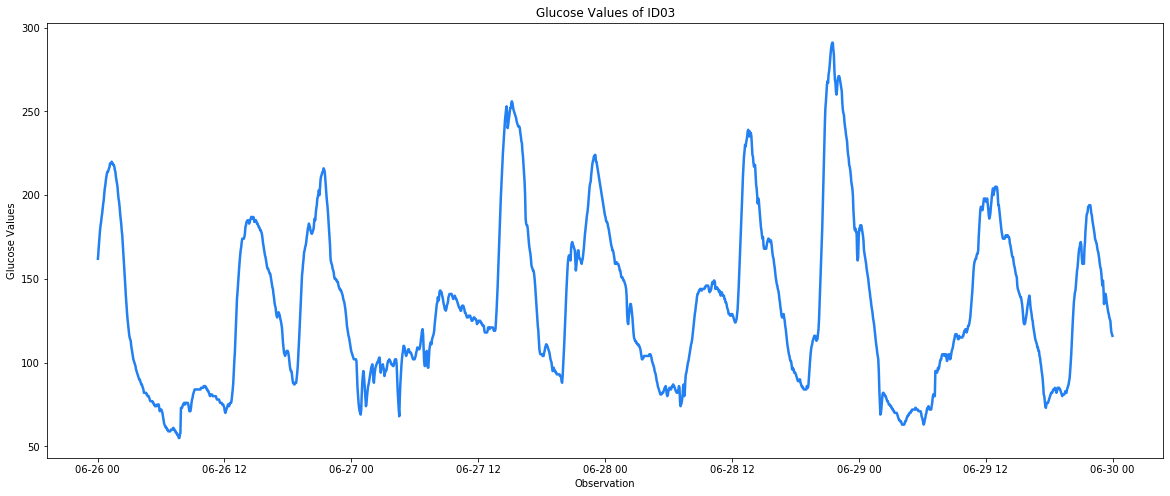

In [13]:
sub = data_fullDays[data_fullDays['subjectId']=="ID01"]
sub = sub.astype({'GlucoseValue':int})
plt.figure(figsize=(20, 8))

plt.plot(sub['Display Time'],sub['GlucoseValue'], color='#2280f2', linewidth=2.5)

plt.title("Glucose Values of ID03")

plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.show();

In [1]:
from TSForecasting.DataTest import DataTest

In [2]:
dt = DataTest()

In [3]:
dt.showData()

NameError: name 'consolidated_paper' is not defined

In [4]:
dt.modifyData()

/Users/snehgajiwala/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/DataTest.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display Time'] = pd.to_datetime(df['Display Time'])


In [5]:
dt.showData()

,Display Time,GlucoseValue,subjectId
0,2016-06-22 00:00:00,135.0,GVP01
1,2016-06-22 00:15:00,128.0,GVP01
2,2016-06-22 00:30:00,126.0,GVP01
3,2016-06-22 00:45:00,125.0,GVP01
4,2016-06-22 01:00:00,125.0,GVP01
...,...,...,...
200013,2027-05-25 23:39:00,168.0,OD596
200014,2027-05-25 23:44:00,172.0,OD596
200015,2027-05-25 23:49:00,174.0,OD596
200016,2027-05-25 23:54:00,174.0,OD596


,Display Time,GlucoseValue,subjectId
0,2014-02-04 00:02:07,88.0,1636-69-001
1,2014-02-04 00:07:07,87.0,1636-69-001
2,2014-02-04 00:12:07,87.0,1636-69-001
3,2014-02-04 00:17:07,91.0,1636-69-001
4,2014-02-04 00:22:07,93.0,1636-69-001
...,...,...,...
287270,2027-05-25 23:39:00,168.0,OD596
287271,2027-05-25 23:44:00,172.0,OD596
287272,2027-05-25 23:49:00,174.0,OD596
287273,2027-05-25 23:54:00,174.0,OD596


,Display Time,GlucoseValue,subjectId
0,2016-06-22 00:00:00,135.0,GVP01
1,2016-06-22 00:15:00,128.0,GVP01
2,2016-06-22 00:30:00,126.0,GVP01
3,2016-06-22 00:45:00,125.0,GVP01
4,2016-06-22 01:00:00,125.0,GVP01
...,...,...,...
200013,2027-05-25 23:39:00,168.0,OD596
200014,2027-05-25 23:44:00,172.0,OD596
200015,2027-05-25 23:49:00,174.0,OD596
200016,2027-05-25 23:54:00,174.0,OD596
